In [4]:
import pandas as pd

In [5]:
do_df = pd.read_csv('./data/경기도시군별온실가스배출량.csv', encoding='cp949')

In [6]:
do_df = do_df[do_df['대상업체및사업장통계'] != 0]

In [7]:
do_df.drop(columns=['대상업체및사업장통계', '통계업종'], axis=1, inplace=True)

In [8]:
do_df

,년도,시군명,전체온실가스배출량(tonCO2-eq)
0,2017,파주시,3204613.0
1,2018,파주시,4711876.0
2,2019,파주시,4823291.0
3,2011,평택시,1020185.0
4,2012,평택시,1085897.0
...,...,...,...
238,2012,파주시,124841.0
239,2013,파주시,276413.0
240,2014,파주시,405488.0
241,2015,파주시,476285.0


In [9]:
pocheon_df = do_df[do_df['시군명'] == '포천시']

In [10]:
pocheon_df

,년도,시군명,전체온실가스배출량(tonCO2-eq)
15,2014,포천시,1967362.0
16,2015,포천시,2285501.0
17,2016,포천시,2001309.0
18,2017,포천시,2917029.0
19,2018,포천시,3079392.0
20,2019,포천시,2550629.0


In [11]:
grouped_do_df = do_df.groupby('시군명')

In [12]:
pd.set_option('display.float_format', '{:.0f}'.format)

In [13]:
mean_grouped_do_df = grouped_do_df.mean()
# sum_grouped_do_df = grouped_do_df.sum()

In [14]:
mean_grouped_do_df.drop(columns='년도', axis=1, inplace=True)
# sum_grouped_do_df.drop(columns='년도', axis=1, inplace=True)

In [15]:
mean_grouped_do_df

,전체온실가스배출량(tonCO2-eq)
시군명,
고양시,236553
과천시,813808
광명시,119944
광주시,351520
구리시,125669
군포시,103361
김포시,52602
남양주시,142836
동두천시,2433305


In [16]:
nearby_cities = ['화성시', '수원시', '안산시', '용인시', '오산시', '평택시']
nearby_cities_df = mean_grouped_do_df[mean_grouped_do_df.index.isin(nearby_cities)]

In [17]:
nearby_cities_df

,전체온실가스배출량(tonCO2-eq)
시군명,
수원시,9054188
안산시,5466019
오산시,668162
용인시,6773654
평택시,2212040
화성시,613980


In [18]:
import matplotlib.pyplot as plt
import matplotlib

In [19]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'AppleGothic' 
matplotlib.rcParams['axes.unicode_minus'] = False

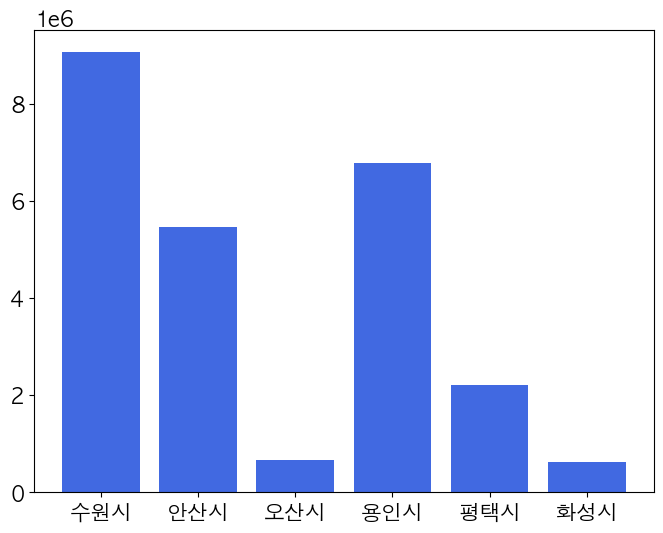

In [22]:
plt.figure(figsize=(8, 6))
bars = plt.bar(nearby_cities_df.index, nearby_cities_df['전체온실가스배출량(tonCO2-eq)'], color='royalblue')

In [25]:
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=8)

ValueError: Image size of 2577x-948539313 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>